## First we will load the spending data 

In [83]:
import pandas

cabinet_spending_data = pandas.read_csv('../data/csv/cabinet_member_spending.csv')
cabinet_spending_data

,Department,President,Nominee,Votes For,Votes Against,Days,domestic_spending,foreign_spending
0,DEPARTMENT OF AGRICULTURE (USDA),Barack Obama,Tom Vilsack,100.0,0.0,3016,4.569137e+10,1.593936e+08
1,DEPARTMENT OF AGRICULTURE (USDA),Donald Trump,Sonny Perdue,87.0,11.0,1097,2.021927e+10,4.459490e+07
2,DEPARTMENT OF AGRICULTURE (USDA),George W. Bush,Ann Veneman,100.0,0.0,1461,1.568655e+10,3.508608e+07
3,DEPARTMENT OF AGRICULTURE (USDA),George W. Bush,Edward Schafer,100.0,0.0,358,5.178157e+09,1.138795e+07
4,DEPARTMENT OF AGRICULTURE (USDA),George W. Bush,Mike Johanns,NaN,NaN,1103,1.311265e+10,4.336811e+07
...,...,...,...,...,...,...,...,...
81,DEPARTMENT OF VETERANS AFFAIRS (VA),Donald Trump,David Shulkin,100.0,0.0,525,3.718589e+10,1.384466e+07
82,DEPARTMENT OF VETERANS AFFAIRS (VA),Donald Trump,Robert Wilkie,86.0,9.0,642,4.664925e+10,1.957169e+07
83,DEPARTMENT OF VETERANS AFFAIRS (VA),George W. Bush,Anthony Principi,100.0,0.0,1464,2.420088e+10,1.488662e+07
84,DEPARTMENT OF VETERANS AFFAIRS (VA),George W. Bush,James Peake,NaN,NaN,403,1.431988e+10,1.761582e+07


## Reduce the fields to ones we want to use in the decision tree

In [84]:
import sklearn.preprocessing

REPUBLICAN_PRESIDENTS = ('George W. Bush', 'Donald Trump')
DEMOCRATIC_PRESIDENTS = ('Barack Obama', )
REPUBLICAN_PARTY = 'Republican'
DEMOCRATIC_PARTY = 'Democrat'

department_label_encoder = sklearn.preprocessing.LabelEncoder()
department_label_encoder.fit(cabinet_spending_data['Department'].unique())
party_label_encoder = sklearn.preprocessing.LabelEncoder()
party_label_encoder.fit([REPUBLICAN_PARTY, DEMOCRATIC_PARTY])

reduced_data = pandas.DataFrame(columns=['department', 'party', 'domestic_spending', 'foreign_spending', 'days'])
reduced_data = reduced_data.assign(
    department=department_label_encoder.transform(cabinet_spending_data['Department']),
    party=party_label_encoder.transform(
        cabinet_spending_data['President'].map(lambda president: REPUBLICAN_PARTY if president in REPUBLICAN_PRESIDENTS else DEMOCRATIC_PARTY)
    ),
    domestic_spending=cabinet_spending_data['domestic_spending'],
    foreign_spending=cabinet_spending_data['foreign_spending'],
    days=cabinet_spending_data['Days'],
)

reduced_data

,department,party,domestic_spending,foreign_spending,days
0,0,0,4.569137e+10,1.593936e+08,3016
1,0,1,2.021927e+10,4.459490e+07,1097
2,0,1,1.568655e+10,3.508608e+07,1461
3,0,1,5.178157e+09,1.138795e+07,358
4,0,1,1.311265e+10,4.336811e+07,1103
...,...,...,...,...,...
81,14,1,3.718589e+10,1.384466e+07,525
82,14,1,4.664925e+10,1.957169e+07,642
83,14,1,2.420088e+10,1.488662e+07,1464
84,14,1,1.431988e+10,1.761582e+07,403


## Build the decision tree

In [85]:
import sklearn.model_selection

TRAINING_PERCENTAGE = 0.7
RANDOM_SEED = 1776

training_data, test_data, training_classifications, test_classifications = sklearn.model_selection.train_test_split(
    reduced_data.loc[:, reduced_data.columns != 'party'],
    reduced_data['party'],
    train_size=TRAINING_PERCENTAGE,
    random_state=RANDOM_SEED,
)

{}


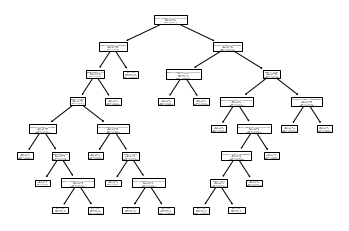

In [112]:
import sklearn.tree
from matplotlib import pyplot as plt

tree_classifier = sklearn.tree.DecisionTreeClassifier(
    random_state=RANDOM_SEED
)
tree_classifier.fit(training_data, training_classifications)

print(party_label_encoder.get_params())
sklearn.tree.plot_tree(
    tree_classifier,
    ax=plt.gca(),
    class_names=[REPUBLICAN_PARTY, DEMOCRATIC_PARTY],
    feature_names=['department', 'domestic_spending', 'foreign_spending', 'days']
)

plt.show()

In [87]:
import sklearn.metrics

predicted_classifications = tree_clasisifer.predict(test_data)
sklearn.metrics.accuracy_score(test_classifications, predicted_classifications)

0.7692307692307693